# 1. Import libraries

In [1]:
import pandas as pd #easy to manipulate data
import numpy as np #generate random numbers
import random as rd #generating an example dataset, no need if working with real data
from sklearn.decomposition import PCA #PCA function
from sklearn import preprocessing #function for scaling the data before performing PCA
import matplotlib.pyplot as plt #draw some graphs
import seaborn as sns #need for pairplot

In [2]:
df = pd.read_fwf("Machine Learning\\eurojob.txt")

* The dataset eurojob  contains the data employed in this case study. It contains the percentage of workforce employed in 1979 in 9 industries for 26 European countries. The industries measured are:

* Agriculture (Agr)
* Mining (Min)
* Manufacturing (Man)
* Power supply industries (Pow)
* Construction (Con)
* Service industries (Ser)
* Finance (Fin)
* Social and personal services (Soc)
* Transport and communications (Tra)

In [3]:
df

,Country,Agr,Min,Man,Pow,Con,Ser,Fin,Soc,Tra
0,Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2
1,Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1
2,France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7
3,WGerm,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1
4,Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1
5,Italy,15.9,0.6,27.6,0.5,10.0,18.1,1.6,20.1,5.7
6,Luxem,7.7,3.1,30.8,0.8,9.2,18.5,4.6,19.2,6.2
7,Nether,6.3,0.1,22.5,1.0,9.9,18.0,6.8,28.5,6.8
8,UK,2.7,1.4,30.2,1.4,6.9,16.9,5.7,28.3,6.4
9,Austria,12.7,1.1,30.2,1.4,9.0,16.8,4.9,16.8,7.0


# 2. Description

In [4]:
# Correlation matrix
df_corr = df.corr()
df_corr

,Agr,Min,Man,Pow,Con,Ser,Fin,Soc,Tra
Agr,1.000000,0.035799,-0.671098,-0.400051,-0.538325,-0.736981,-0.219836,-0.746790,-0.564920
Min,0.035799,1.000000,0.445196,0.405455,-0.025598,-0.396565,-0.442683,-0.281012,0.156629
Man,-0.671098,0.445196,1.000000,0.385346,0.494479,0.203826,-0.155829,0.154171,0.350692
Pow,-0.400051,0.405455,0.385346,1.000000,0.059889,0.201907,0.109862,0.132411,0.375231
Con,-0.538325,-0.025598,0.494479,0.059889,1.000000,0.356022,0.016283,0.158243,0.387662
Ser,-0.736981,-0.396565,0.203826,0.201907,0.356022,1.000000,0.365555,0.572173,0.187554
Fin,-0.219836,-0.442683,-0.155829,0.109862,0.016283,0.365555,1.000000,0.107640,-0.245926
Soc,-0.746790,-0.281012,0.154171,0.132411,0.158243,0.572173,0.107640,1.000000,0.567867
Tra,-0.564920,0.156629,0.350692,0.375231,0.387662,0.187554,-0.245926,0.567867,1.000000


* Some variables are highly correlated such as Ser/Soc, Man/Con, Min/Man and Soc/Tra

In [5]:
# Calculate the measurements of each variable
summary = df.describe()
summary = summary.transpose()

In [6]:
summary.transpose()

,Agr,Min,Man,Pow,Con,Ser,Fin,Soc,Tra
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,19.130769,1.253846,27.007692,0.907692,8.165385,12.957692,4.000000,20.023077,6.546154
std,15.546569,0.970044,7.007763,0.376216,1.645586,4.575253,2.806564,6.829542,1.391469
min,2.700000,0.100000,7.900000,0.100000,2.800000,5.200000,0.500000,5.300000,3.200000
25%,7.700000,0.525000,23.000000,0.600000,7.525000,9.250000,1.225000,16.250000,5.700000
50%,14.450000,0.950000,27.550000,0.850000,8.350000,14.400000,4.650000,19.650000,6.700000
75%,23.675000,1.800000,30.200000,1.175000,8.975000,16.875000,5.925000,24.125000,7.075000
max,66.800000,3.100000,41.200000,1.900000,11.500000,19.100000,11.300000,32.400000,9.400000


* The workforce is mainly present in 3 categories : Agr, Man and Soc respectively 19%, 27% and 20%

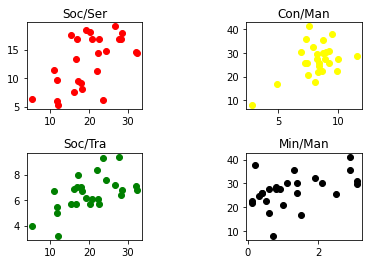

In [7]:
fig, ax = plt.subplots(2, 2)

ax[0,0].scatter(df["Soc"], df["Ser"], c = 'red');
ax[0,0].set_title("Soc/Ser");

ax[0,1].scatter(df["Con"], df["Man"], c = 'yellow', label = "Con/Man");
ax[0,1].set_title("Con/Man");

ax[1,0].scatter(df["Soc"], df["Tra"], c = 'green', label = "Soc/Tra");
ax[1,0].set_title("Soc/Tra");

ax[1,1].scatter(df["Min"], df["Man"], c = 'black', label = "Min/Man");
ax[1,1].set_title("Min/Man");

plt.subplots_adjust(wspace=0.9, hspace=0.5)

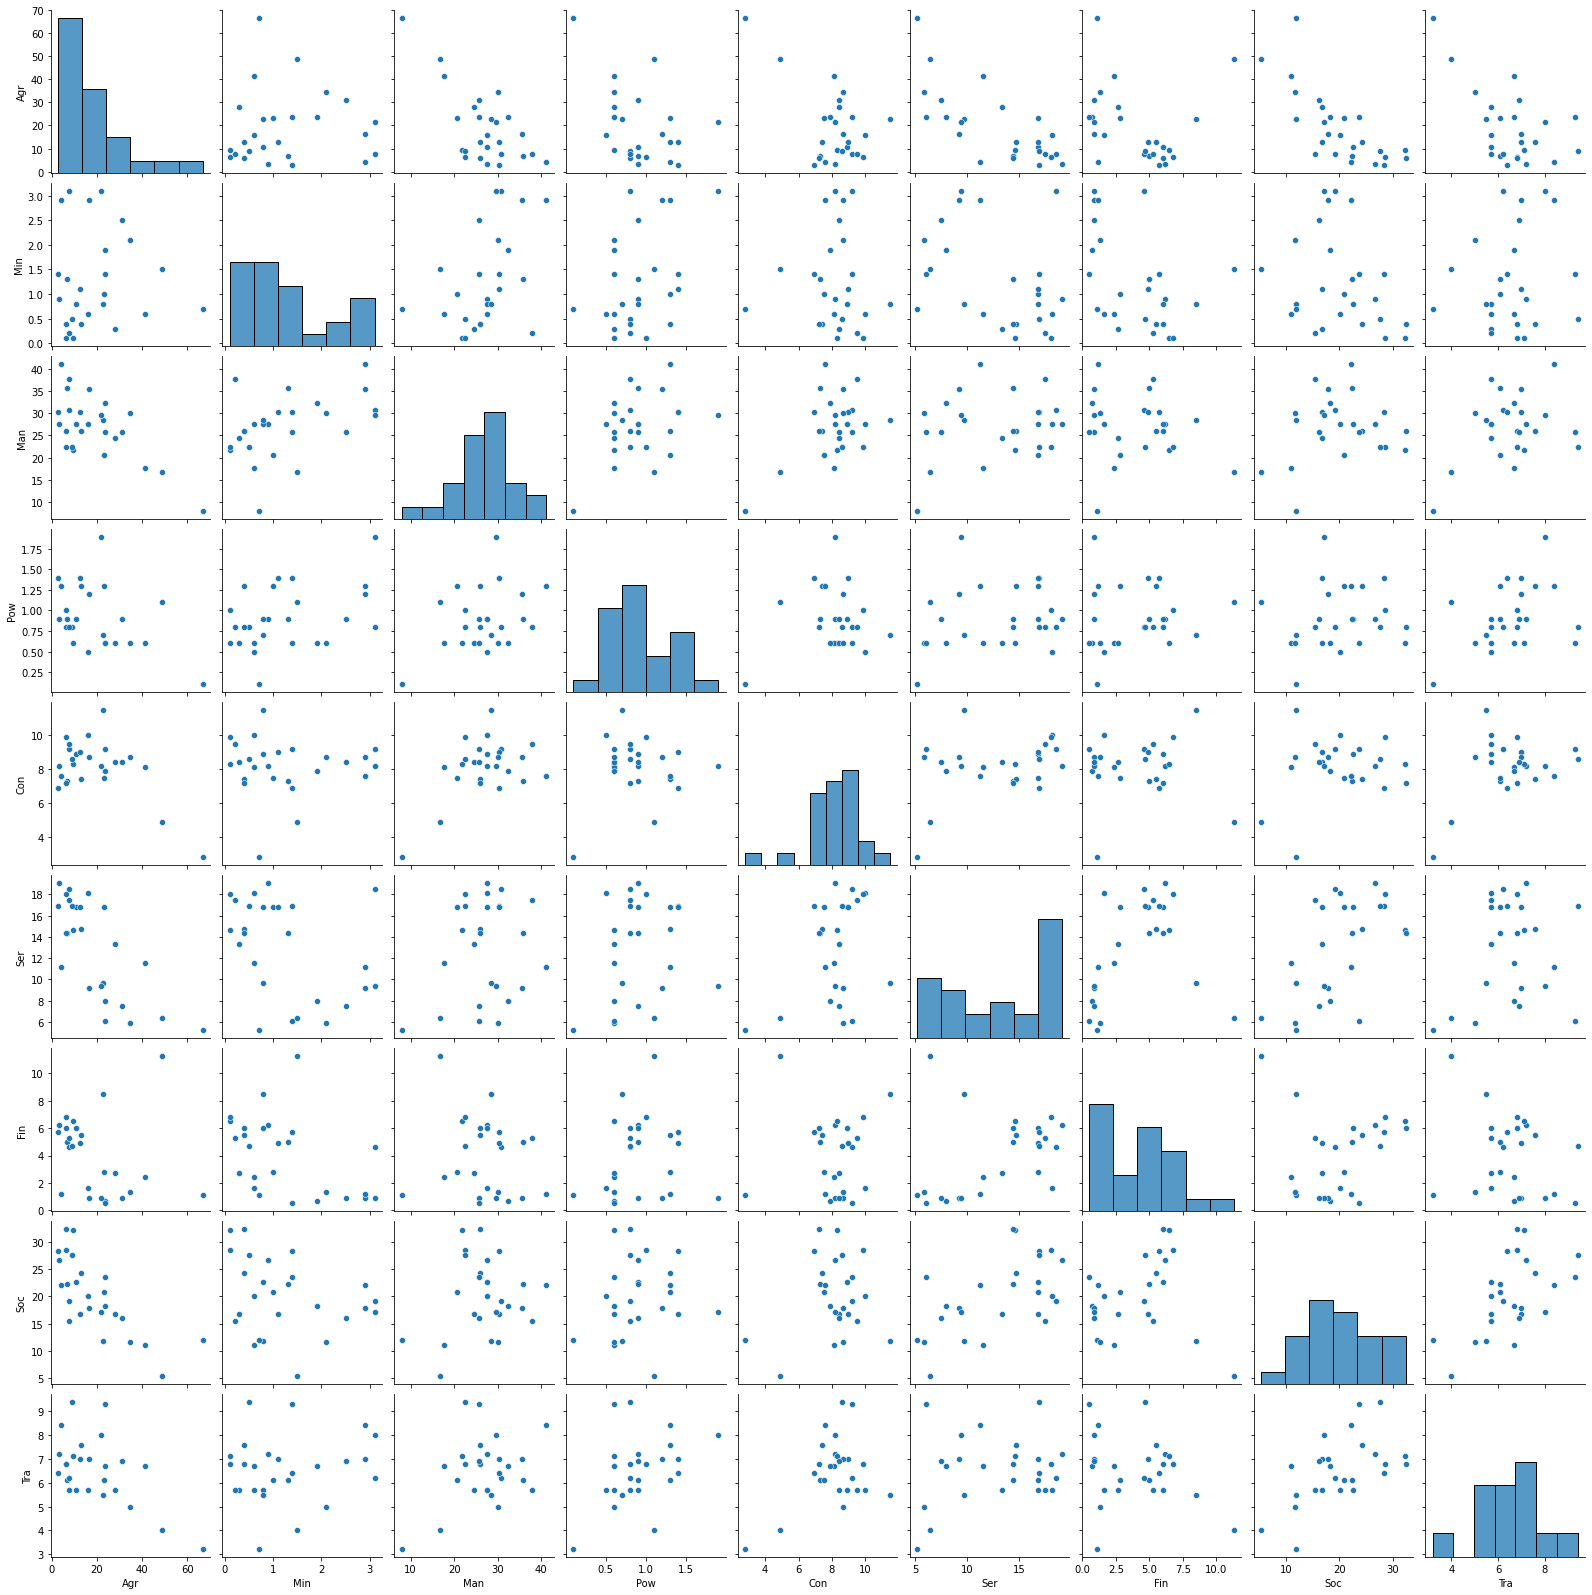

In [8]:
sns.pairplot(df);

# 3. PCA

* In SkLearn, le scale() :

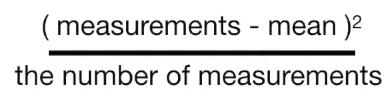

* In R, le scale() :

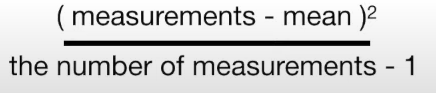

In [9]:
df_copy = df.copy()
df_copy = df_copy.drop("Country", axis=1)
df_copy

,Agr,Min,Man,Pow,Con,Ser,Fin,Soc,Tra
0,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2
1,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1
2,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7
3,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1
4,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1
5,15.9,0.6,27.6,0.5,10.0,18.1,1.6,20.1,5.7
6,7.7,3.1,30.8,0.8,9.2,18.5,4.6,19.2,6.2
7,6.3,0.1,22.5,1.0,9.9,18.0,6.8,28.5,6.8
8,2.7,1.4,30.2,1.4,6.9,16.9,5.7,28.3,6.4
9,12.7,1.1,30.2,1.4,9.0,16.8,4.9,16.8,7.0


## 3.1 Standardisation

In [10]:
scaled_data = preprocessing.scale(df_copy)
scaled_data

array([[-1.03844649, -0.37199739,  0.08619551, -0.02085144,  0.02145187,
         1.3690936 ,  0.79940055,  0.9820822 ,  0.47920226],
       [-0.65142586, -1.21303495, -0.75784885, -0.83405766,  0.08342395,
         0.36606322,  0.90840971,  1.81828787,  0.40591251],
       [-0.54647111, -0.47712708,  0.07164302, -0.02085144,  0.4552564 ,
         0.85643363,  0.72672777,  0.38479244, -0.62014411],
       [-0.81541765,  0.0485214 ,  1.27949961, -0.02085144, -0.53629681,
         0.32148409,  0.36336389,  0.33999571, -0.32698507],
       [ 0.26692818, -0.26686769, -0.91792623,  1.06342351, -0.41235266,
         0.85643363, -0.43603666,  0.11601205, -0.32698507],
       [-0.21192785, -0.68738647,  0.08619551, -1.10512639,  1.13694923,
         1.14619796, -0.87207332,  0.01148634, -0.62014411],
       [-0.74982093,  1.94085592,  0.55187516, -0.29192018,  0.64117263,
         1.23535621,  0.21801833, -0.12290385, -0.25369532],
       [-0.84165634, -1.21303495, -0.65598143,  0.2502173 ,  1

* Scaling is putting mean to 0 and standard deviation to 1

In [11]:
print("Standard deviation :",scaled_data.std())
print("Mean : {:.1f}".format(scaled_data.mean()))

Standard deviation : 1.0
Mean : 0.0


## 3.2 Apply PCA

* Here, all the variables have the same unit mesure so we don't have to reduce, but we will do it

In [12]:
pca = PCA()
pca.fit(scaled_data) #here we do all the PCA maths (loading scores and variation of each principal component)
pca_data = pca.transform(scaled_data) #generate coordinates for a PCA graph based on the loading scores and the scaled data

In [13]:
pca_data

array([[-1.71049775e+00, -1.22179120e+00,  1.14764763e-01,
        -3.39492013e-01, -3.24535687e-01, -4.72540889e-02,
         3.40087656e-01,  4.03035176e-01, -1.09040428e-03],
       [-9.52902209e-01, -2.12778495e+00, -9.50722162e-01,
        -5.93948931e-01,  1.02661108e-01, -8.27302278e-01,
         3.02922808e-01, -3.51835733e-01,  1.56187715e-02],
       [-7.54629546e-01, -1.12120754e+00,  4.97953700e-01,
         5.00329097e-01, -2.99718758e-01,  1.15807054e-01,
         1.85478024e-01, -2.66192438e-01, -5.07430715e-04],
       [-8.52552505e-01, -1.13765873e-02,  5.79526789e-01,
         1.10469840e-01, -1.16522683e+00, -6.18099387e-01,
        -4.44559232e-01,  1.94484110e-01, -6.53937174e-03],
       [ 1.03501768e-01, -4.13987173e-01,  3.84047875e-01,
        -9.26663957e-01,  1.52213291e-02,  1.42419990e+00,
         3.70428537e-02, -3.34038901e-01,  1.08793301e-02],
       [-3.75406515e-01, -7.69547385e-01, -1.06059786e+00,
         1.47723127e+00, -6.45182652e-01,  1.002104

# 4. Graphs

## 4.1. Scree plot

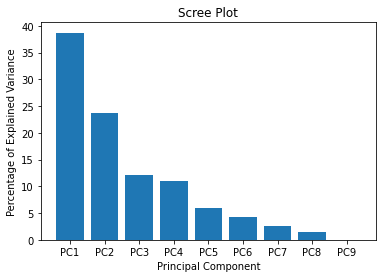

In [14]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals = 1) #percentage of varation per PC
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [15]:
pca.explained_variance_ratio_

array([3.87461252e-01, 2.36685905e-01, 1.22106401e-01, 1.10498109e-01,
       6.03575251e-02, 4.26030740e-02, 2.50837839e-02, 1.51988806e-02,
       5.06945584e-06])

In [16]:
per_var

array([38.7, 23.7, 12.2, 11. ,  6. ,  4.3,  2.5,  1.5,  0. ])

In [17]:
n = df.shape[0]
eigval = (n-1)/n*pca.explained_variance_
print(eigval)
sqrt_eigval = np.sqrt(eigval)

[3.48715127e+00 2.13017314e+00 1.09895761e+00 9.94482978e-01
 5.43217725e-01 3.83427666e-01 2.25754055e-01 1.36789926e-01
 4.56251025e-05]


In [18]:
df.shape

(26, 10)

In [19]:
p = df.shape[1] - 1
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]

In [2]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
cercle = plt.Circle((0,0),2,color='blue',fill=False)
ax.add_artist(cercle)

plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             df.columns.values[i])

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()

NameError: name 'plt' is not defined

In [1]:
#positionnement des individus dans le premier plan
fig, ax = plt.subplots(figsize=(12,12))
ax.set_xlim(-6,6) #même limites en abscisse
ax.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
    plt.annotate(df.index[i],(pca_data[i,0],pca_data[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

NameError: name 'plt' is not defined

In [26]:
type(pca_data[0,0])

numpy.float64